In [1]:
import os
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.neighbors import NearestNeighbors
import re
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
import time
import xml.etree.cElementTree as ET

In [3]:
import stop_words

In [4]:
tree = ET.ElementTree(file="file1.xml")
root = tree.getroot()

In [5]:
data_full= []

catalog=root[0][0]
for i in range(50):
    data_full.append(catalog[i].text)
catalog=root[0][1]
for i in range(50,100):
    data_full.append(catalog[i-50].text)
catalog=root[0][2]
for i in range(100,150):
    data_full.append(catalog[i-100].text)
catalog=root[0][3]
for i in range(150,200):
    data_full.append(catalog[i-150].text)


In [6]:
len(data_full)

200

In [7]:
data_full[5]

'Российская теннисистка Мария Шарапова прокомментировала поражение в 1/8 финала Открытого чемпионата Австралии (Australian Open). Ее слова приводятся на сайте турнира.\nЖурналисты спросили спортсменку об отношении к реакции трибун, которые освистали ее после перерыва, а затем хлопали, когда Шарапова получила предупреждение за затяжку времени. «Что вы хотите, чтобы я сказала на это? Я думаю, это глупый вопрос», — заявила теннисистка в ответ.\nМАТЕРИАЛЫ ПО ТЕМЕ\n00:01 — 6 января\nНеожиданные повороты\nБудущее Хабиба, закат Роналду с Месси и уход Шараповой. Что ждет спорт в 2019-м\nШарапова рассказала о проблемах с плечом, которые продолжают беспокоить ее. По словам теннисистки, она старается контролировать боль. Представители СМИ спросили, не нужен ли ей мельдоний для купирования боли, будь он легален. «Другие вопросы есть?» — отреагировала Шарапова.\nВ 1/8 финала Australian Open россиянка проиграла австралийке Эшли Барти. Матч завершился со счетом 4:6, 6:1, 6:4 в пользу австралийки.\nБо

In [8]:
tree = ET.ElementTree(file="laba2_file.xml")
root = tree.getroot()

In [9]:
data_train = []

catalog=root[0][0]
for i in range(50):
    data_train.append(catalog[i].text)
catalog=root[0][1]
for i in range(50,100):
    data_train.append(catalog[i-50].text)
catalog=root[0][2]
for i in range(100,150):
    data_train.append(catalog[i-100].text)
catalog=root[0][3]
for i in range(150,200):
    data_train.append(catalog[i-150].text)


In [10]:
len(data_train)

200

In [11]:
data_train[0]

'легенд смеша единоборств федор емельяненк очередн карьер стат чемпион фина тяжеловес пошел сценар россиянин американц уда превзойт последн император главн бо расскажет закат импер пуска последн император видим легкост разобра двум соперник равн счита противостоян впечатля побед двум американск ветеран бывш бойц абсолютн бойцовск чемпионат фрэнк мир остав вопрос ответ форм емельяненк наскольк уверен чувств вязк борьб мир федор разобра быстр дела вывод знает ждал россиянин уда переб соперник стойк сут весов категор удар емельяненк поцелу восточн экспресс американск гангстер неплох выглядел федор борьб насторож насторож поклонник российск легенд преддвер поединк опасн бо малогабаритн федор подчеркнут избега борьб одн эпизод дожда выстав гард откажет вернет стойк свидетельств уверен собствен боксерск навык нежелан борот материал тем январ федор вырос бо емельяненк гот отправ кумир пенс россиянин вряд доказыва год прав сильн момент планет неоднократн называ лучш тяжеловес спорт емельяненк 

In [13]:
russian_stop_words=stop_words.get_stop_words('ru') 


vectorizer = TfidfVectorizer(stop_words=russian_stop_words) 
tfidf_train = vectorizer.fit_transform(data_train) 

print(tfidf_train.shape)

(200, 10584)


In [17]:
tfidf_train

<200x10584 sparse matrix of type '<class 'numpy.float64'>'
	with 35829 stored elements in Compressed Sparse Row format>

In [20]:
valid_inds = []

for i_el, el in enumerate(tfidf_train):
    if el.getnnz() > 0:
        valid_inds.append(i_el)        
valid_inds = np.asarray(valid_inds)
        
tfidf_train_filt = tfidf_train[valid_inds]
print(tfidf_train_filt.shape)

(200, 10584)


In [124]:
len(valid_inds)

200

In [125]:
valid_inds

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [21]:
tfidf_train_filt

<200x10584 sparse matrix of type '<class 'numpy.float64'>'
	with 35829 stored elements in Compressed Sparse Row format>

In [22]:
predictor = NearestNeighbors(n_neighbors=1, algorithm='brute', metric='cosine').fit(tfidf_train_filt)

In [100]:
request = 'спортивные соревнования в России 2015 год'

In [101]:
from nltk.stem.snowball import RussianStemmer

In [102]:
words = request.split()
print(words)
print(len(words))

['спортивные', 'соревнования', 'в', 'России', '2015', 'год']
6


In [103]:
rus_stem = RussianStemmer()    
for i in range(len(words)):
    words[i]=rus_stem.stem(words[i])
new_str = ' '.join(words)
print(words)
request=new_str
print(request)

['спортивн', 'соревнован', 'в', 'росс', '2015', 'год']
спортивн соревнован в росс 2015 год


In [104]:
print(request)

спортивн соревнован в росс 2015 год


In [105]:
tfidf_test = vectorizer.transform([vectorizer.decode(request)])

print(tfidf_test.shape)

(1, 10584)


In [106]:
tfidf_test

<1x10584 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [107]:
vectorizer.vocabulary_

{'легенд': 3767,
 'смеша': 8540,
 'единоборств': 2228,
 'федор': 9873,
 'емельяненк': 2250,
 'очередн': 5731,
 'карьер': 3187,
 'стат': 8929,
 'чемпион': 10188,
 'фина': 9917,
 'тяжеловес': 9471,
 'пошел': 6813,
 'сценар': 9093,
 'россиянин': 8101,
 'американц': 146,
 'уда': 9542,
 'превзойт': 6866,
 'последн': 6682,
 'император': 2906,
 'главн': 1572,
 'бо': 551,
 'расскажет': 7824,
 'закат': 2474,
 'импер': 2905,
 'пуска': 7548,
 'видим': 926,
 'легкост': 3772,
 'разобра': 7720,
 'двум': 1816,
 'соперник': 8707,
 'равн': 7603,
 'счита': 9102,
 'противостоян': 7460,
 'впечатля': 1181,
 'побед': 6136,
 'американск': 145,
 'ветеран': 870,
 'бывш': 721,
 'бойц': 575,
 'абсолютн': 7,
 'бойцовск': 576,
 'чемпионат': 10189,
 'фрэнк': 9989,
 'мир': 4181,
 'остав': 5482,
 'вопрос': 1121,
 'ответ': 5534,
 'форм': 9959,
 'наскольк': 4557,
 'уверен': 9508,
 'чувств': 10248,
 'вязк': 1480,
 'борьб': 624,
 'быстр': 724,
 'дела': 1854,
 'вывод': 1291,
 'знает': 2738,
 'ждал': 2277,
 'переб': 5871,


In [108]:
print(tfidf_test[0])

  (0, 8831)	0.6756328516161295
  (0, 8720)	0.6271495118706888
  (0, 8097)	0.38756127202987395


In [109]:
vectorizer.get_feature_names()[8097]

'росс'

In [110]:
vectorizer.get_feature_names()[8831]

'спортивн'

In [111]:
vectorizer.get_feature_names()[8720]

'соревнован'

In [153]:
distances, inds_pred = predictor.kneighbors(tfidf_test, n_neighbors=5)

In [154]:
inds_pred

array([[ 22,  45, 165,  49,  38]], dtype=int64)

In [155]:
valid_inds[165]

165

In [156]:
len(distances)

1

In [157]:
distances=sorted(distances, reverse=True)

In [158]:
distances = np.squeeze(distances)
inds_pred = np.squeeze(inds_pred)

In [159]:
distances

array([0.88987731, 0.90817715, 0.90832021, 0.91224013, 0.9155841 ])

(0, 1)

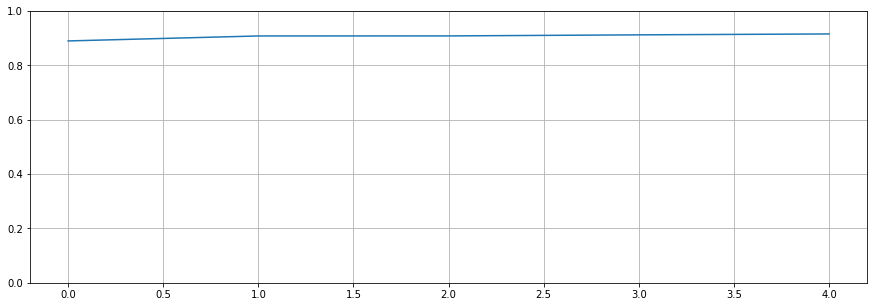

In [160]:
plt.figure(figsize=(15, 5))

plt.plot(distances)
plt.grid(True)
plt.ylim(0, 1)

In [164]:
for i, item in enumerate(np.asarray(data_full)[inds_pred], start=1):
    print ('###### NEWS {}'.format(i))
    print("\n")
    print(item)
    print("\n")
    print ('######')
    print("\n\n\n\n\n\n")

###### NEWS 1


Бывший старший тренер женской сборной России по биатлону Вольфганг Пихлер раскритиковал работу спортивного комментатора Дмитрия Губерниева. Его слова приводит «Матч ТВ».
«У меня есть свое мнение о Губерниеве. Он не журналист. Он артист. Хотя он думает, что является великим экспертом во всем. У меня есть правило — между мной и Губерниевым должно быть минимум 10 метров», — заявил Пихлер.
В декабре 2018-го вице-президент Международного союза биатлонистов (IBU) Иржи Гамза также раскритиковал деятельность российского журналиста. «Он вредит вашему биатлону. И мировому тоже», — подчеркнул Гамза и отметил, что не имеет желания лично пообщаться с ним.
Губерниев — журналист и комменатор телеканала «Матч ТВ». Он активно освещает российский биатлон и высказывает свое мнение о скандалах вокруг сборной России.
Пихлер тренировал женскую российскую команду с 2011 по 2014 год.
Больше мрачных и странных новостей в Telegram-канале «Лента дна». Подписывайтесь!


######







###### NEWS 2